In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from scipy import io

In [7]:
dataset = io.matlab.loadmat('.\data\Data_hoda_full.mat')

In [9]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0, 255, 255,   0],
                [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0, 255, 255, 255, 255],
                [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                   0,   0, 255, 255, 255, 255,   0],
                [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                   0, 255, 255, 255, 255, 255,   0],
                [255, 255, 255, 255,   0,  

In [10]:
X_train = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])

X_test = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

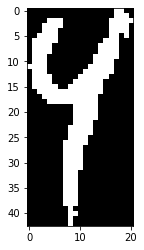

6


In [13]:
plt.imshow(X_train[20], cmap='gray')
plt.show()
print(y_train[20])

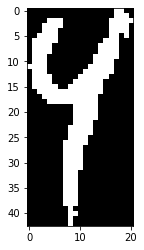

6


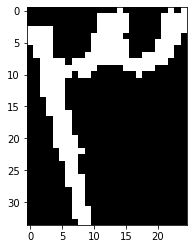

3


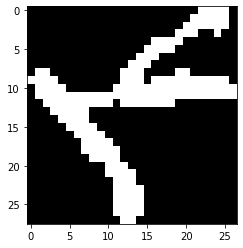

4


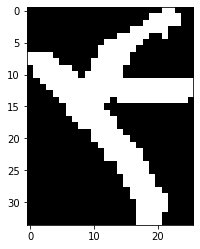

4


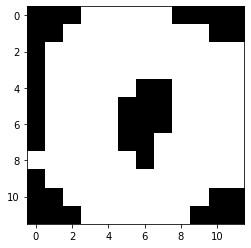

0


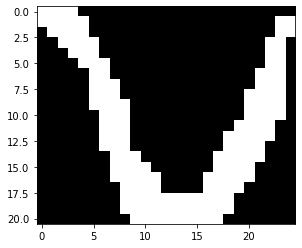

7


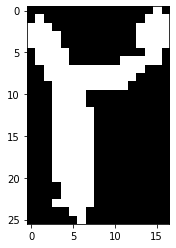

2


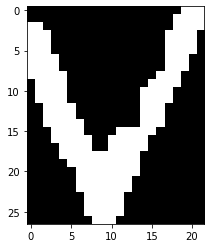

7


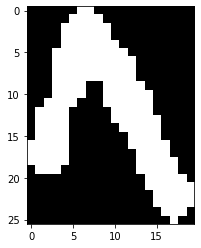

8


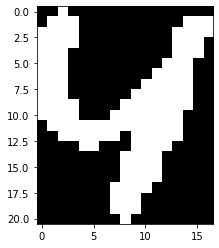

6


In [14]:
for i in range(20, 30):
    plt.imshow(X_train[i], cmap='gray')
    plt.show()
    print(y_train[i])

In [16]:
X_train_5by5 = [resize(img, (5, 5)) for img in X_train]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test]

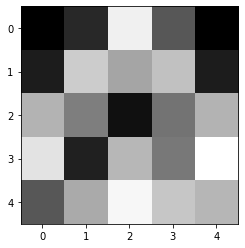

In [17]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

In [18]:
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn_model = KNeighborsClassifier(n_neighbors= k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
sample = 9
X = [X_test[sample]]
predict_class = knn_model.predict(X)
actual_class = y_test[sample]
print(f'actual = {actual_class}\npredict={predict_class}')


actual = 2
predict=[3]


In [24]:
print(knn_model.predict_proba(X))

[[0.         0.         0.33333333 0.66666667 0.         0.
  0.         0.         0.         0.        ]]


In [25]:
accuracy = knn_model.score(X_test, y_test)

In [26]:
print(accuracy)

0.96
